In [1]:
import numpy as np

In [2]:
import pandas as pd

C:\Users\soura\AppData\Local\Temp\ipykernel_23576\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
columns_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [4]:
df = pd.read_csv('u.data', sep='\t', names=columns_names)

In [5]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [6]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [7]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
df = pd.merge(df, movie_titles, on='item_id')

In [9]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
import seaborn as sns

In [13]:
sns.set_style('white')

In [18]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [19]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [21]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [23]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [24]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [25]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

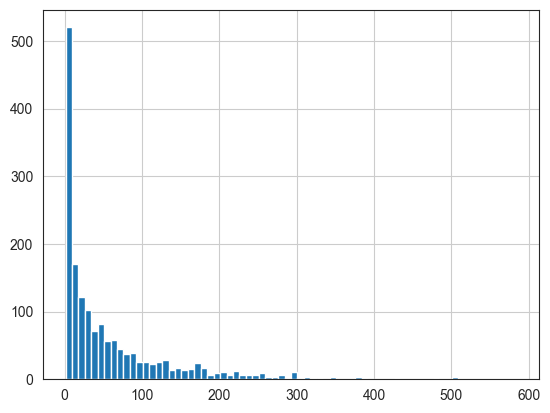

In [26]:
ratings['num of ratings'].hist(bins = 70)

<Axes: >

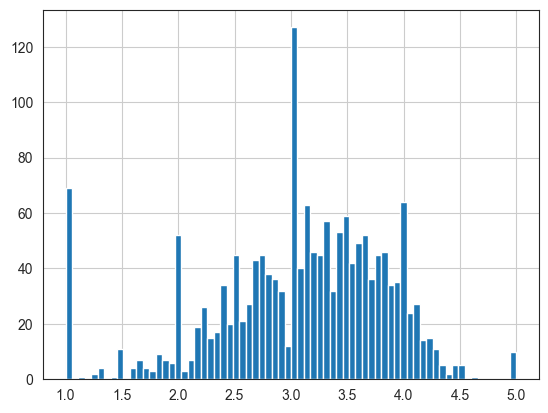

In [28]:
ratings['rating'].hist(bins = 70)

In [ ]:
sns.jointplot(x='rating', y='num of ratings', )